In [1]:
import os
import math
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["svg.fonttype"]="none"

## Dossier où sont les fichiers à étudier

In [53]:
#folder_path="/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/_A_PopPlinn/class/PopPlinnTxtSel2"
#folder_path="/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/PopPlinn/class/PopPlinnTxt"
folder_path="/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/00_tests"

filelist = []
for path, dirs, files in os.walk(folder_path):
    for filename in files:
        if 'txt' in filename :
                filelist.append(filename)
filelist.sort()

print(len(filelist))
#print (filelist)

#get classes in string
#class_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/_A_PopPlinn/class/PopPlinnTxtSel2/")
#class_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/PopPlinn/class/PopPlinnTxt/")
class_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/00_tests/")


7


## Utilitaires

In [54]:
def f_to_midi (f) :
    return 69+12*math.log(f/440,2)

print ("note de freq 261Hz :" , f_to_midi (261))

def midi_to_f (n) :
    return 440*2**((n-69)/12)

print ("frequence de note 60 :" , midi_to_f (60), "Hz")

def dx2x(intervalles):
    res=[0]
    for i in range (len (intervalles)):
        res.append(res[i]+intervalles[i-1])
    return res
               
def a2db (a):
    if(a<=0.000001):res = -120
    else:
        res = 20*math.log(a,10)
    return res

# version limitée à un ambitus 0 (0.001) - 60dB (1)               
def a2db60 (a):
    if(a<=0.001):res = 0
    else:res = 60+20*math.log(a,10)
    return res

print ("amp = 0.0 => amplitude en dB :" , round(a2db(0.000001), 3), "dB")
print ("amp = 0.0001 => amplitude en dB :" , round(a2db(0.0001), 3), "dB")
print ("amp = 0.5 => amplitude en dB :" , round(a2db(0.5), 3), "dB")
print ("amp = 1 => amplitude en dB :" , a2db(1), "dB")
print ("amp60 = 0 => amplitude60 en dB :" , a2db60(0), "dB")
print ("amp60 = 1 => amplitude60 en dB :" , a2db60(1), "dB")

note de freq 261Hz : 59.95855539654269
frequence de note 60 : 261.6255653005986 Hz
amp = 0.0 => amplitude en dB : -120 dB
amp = 0.0001 => amplitude en dB : -80.0 dB
amp = 0.5 => amplitude en dB : -6.021 dB
amp = 1 => amplitude en dB : 0.0 dB
amp60 = 0 => amplitude60 en dB : 0 dB
amp60 = 1 => amplitude60 en dB : 60.0 dB


## bande de fréquences

In [55]:
f_ls = [21.5,32.3,43.1,53.8,64.6,86.1,107.7,140.0,172.3,215.3,269.2,344.5,441.4,549.1,699.8,872.1,1109.0,1388.9,1755.0,2217.9,2788.5,3520.7,4435.8,5587.9,7041.4,8871.7,11175.7,14071.9]

L = [] # liste des tailles des lignes
for k in range(27):
    L.append(4+2*k)

f_c = [] # frequences centrales des bandes
for i in range(len(f_ls)-1):
    f_c.append(math.sqrt(f_ls[i+1]*f_ls[i]))
    
f_c_midi = []
for i in range(len(f_c)):
    f_c_midi.append(f_to_midi(f_c[i]))

f_c_moy = 0 
for i in range(len(f_c)):
    f_c_moy += f_c[i]
    f_c_moy /= 27
    
f_c_gmoy = 0
for i in range(len(f_c)):
    f_c_gmoy += math.log(f_c[i], 2)
    f_c_gmoyR =  2**(f_c_gmoy/27)

#formule equivalente
#f_c_gmoy2 = 0
#for i in range(len(f_c)):
#    f_c_gmoy2 += f_to_midi(f_c[i])
#    f_c_gmoyR2 =  midi_to_f(f_c_gmoy2/27)

    
print("len(f_ls) :", len(f_ls), "bornes")

W=[]
for i in range(len(f_ls)-1):
    W.append(round(f_ls[i+1]-f_ls[i], 2))
print("w :" , W)    
    
print ("f_c :", np.round(f_c, 1))
print ("f_c_moy :", round(f_c_moy,1), "Hz") # (en Hz) moyenne des frequences des centres des bandes 
print ("f_c_gmoyR :", round(f_c_gmoyR,1), "Hz") # (en Hz) moyenne des centres calculée par les notes MIDI
#print ("f_c_gmoyR :", f_c_gmoyR2) # (en Hz) moyenne des centres calculée par les notes MIDI

f_cA = np.asarray(f_c)
f_cA = f_cA[:, np.newaxis]
#print (round(3.149 , 2))


len(f_ls) : 28 bornes
w : [10.8, 10.8, 10.7, 10.8, 21.5, 21.6, 32.3, 32.3, 43.0, 53.9, 75.3, 96.9, 107.7, 150.7, 172.3, 236.9, 279.9, 366.1, 462.9, 570.6, 732.2, 915.1, 1152.1, 1453.5, 1830.3, 2304.0, 2896.2]
f_c : [   26.4    37.3    48.2    59.     74.6    96.3   122.8   155.3   192.6
   240.7   304.5   390.    492.3   619.9   781.2   983.4  1241.1  1561.3
  1972.9  2486.9  3133.3  3951.9  4978.6  6272.7  7903.7  9957.3 12540.5]
f_c_moy : 478.5 Hz
f_c_gmoyR : 612.6 Hz


In [56]:
# read filetxt and generate array S
def read(filetext):
    with open(filetext) as f:
        mylist = f.read().splitlines()
        for x in range(8):
            mylist.pop(0)
        S=[]
        for element in reversed(mylist):
            element2=[float(i) for i in element.split()]
            S.append(element2)
        return S

In [57]:
filelist

['impuls2hz_sr44100_deb00_00_00_t02_00.txt',
 'noise_sr44100_deb00_00_00_t02_00.txt',
 'pink_sr44100_deb00_00_00_t02_00.txt',
 'sinus13000_sr44100_deb00_00_00_t02_00.txt',
 'sinus17000_sr44100_deb00_00_00_t02_00.txt',
 'sinus5000_sr44100_deb00_00_00_t02_00.txt',
 'sinus500_sr44100_deb00_00_00_t02_00.txt']

In [58]:
file1 = filelist[0]
S1 = read(file1)
file2 = filelist[1]
S2 = read(file2)
file3 = filelist[2]
S3 = read(file3)
file4 = filelist[3]
S4 = read(file4)
file5 = filelist[4]
S5 = read(file5)

print (file1)
print (file2)
print (file3)
print (file4)
print (file5)

impuls2hz_sr44100_deb00_00_00_t02_00.txt
noise_sr44100_deb00_00_00_t02_00.txt
pink_sr44100_deb00_00_00_t02_00.txt
sinus13000_sr44100_deb00_00_00_t02_00.txt
sinus17000_sr44100_deb00_00_00_t02_00.txt


## calcule la date d'une analyse d'apres le nom du fichier

In [59]:

def timetxt (filetext):
    str_L = filetext.rsplit(sep='_')
    test = 0
    result = 0
    for str in str_L:
        if test == 3:
            cent = int(str)
            result+=(cent/100)
            test = 0
        if test == 2:
            sec = int(str)
            test = 3
            result+=sec
        if re.search('deb', str):
            test = 1
            min = int(str[4-5])
            result+=(min*60)
            test = 2
    return result

print(timetxt(file2))

0.0


## Calcul dans chaque bande des amplitudes min max, puis donne la moyenne pour l'ensemble des bandes

In [60]:
def ampmax(S, k):
    ampmx = 0
    for j in range(4+2*k):
        ampmx = max(ampmx, S[k][j])
    return ampmx

def ampmin(S, k):
    ampmn = 1
    for j in range(4+2*k):
        ampmn = min(ampmn, S[k][j])
    return ampmn

def deltaamp(S, k):
    return ampmax(S, k) - ampmin(S, k)

def moy_ecart_amps(S):
    ecarts = []
    for k in range(27):
        ecarts.append(deltaamp(S, k))
    ecartsA = np.asarray(ecarts)
    return ecartsA.mean()
        

#for k in range(27):
#    print("k =",1+k ,"amp min=", round(ampmin(S1, k),3),"amp max=", round(ampmax(S1, k),3), "ecart" ,round(deltaamp(S1, k), 2))
#for k in range(27):
#    print("k =",1+k ,"amp min=", round(ampmin(S2, k),3),"amp max=", round(ampmax(S2, k),3), "ecart" ,round(deltaamp(S2, k), 3))
    
print("moyenne des écarts d'amplitudes ", file1, " :",round(moy_ecart_amps (S1),3))
print("moyenne des écarts d'amplitudes ", file2, " :",round(moy_ecart_amps (S2),3))
print("moyenne des écarts d'amplitudes ", file3, " :",round(moy_ecart_amps (S3),3))

moyenne des écarts d'amplitudes  impuls2hz_sr44100_deb00_00_00_t02_00.txt  : 0.002
moyenne des écarts d'amplitudes  noise_sr44100_deb00_00_00_t02_00.txt  : 0.027
moyenne des écarts d'amplitudes  pink_sr44100_deb00_00_00_t02_00.txt  : 0.016


## Calcul du taux de croissance

In [115]:
# taux de croissance = somme des valeurs positives pour la diff entre cell et cell+1

def txcroiss1 (bande):
    var = 0
    n = len(bande)
    for j in range(n-1):
        var += max(0, (bande[j]-bande[j+1]))
    return var/n

print (txcroiss1([0,1, 2, -3]))
print (txcroiss1([1,1, 2, 1]))
print (txcroiss1([0,-1, 2, -3]))
                   


def txcroiss2 (bande):
    var = 0
    n = 0
    for j in range(len(bande)-1):
        y = (bande[j]-bande[j+1])*max(bande[j],bande[j+1])
        if (y > 0):
            var += y
            n += 1
    if (n==0): res = 0 
    else : res = var/n
    return res

print ("lklkl")                 
print (txcroiss2([0,1, 2, -3]))
print (txcroiss2([0,1, 10, -3]))
print (txcroiss2([1,1, 2, 1]))
print (txcroiss2([0,-1, 2, -3]))
                   



1.25
0.25
1.5
lklkl
10.0
130.0
2.0
10.0


In [109]:
n = 0
if (n==0): res = 0 
else : res = "kjkjk"
print (res)

0


In [116]:
def txcroiss2s (S):
    res = 0
    for k in range(27):
        res += txcroiss2(S[k])
    return 100*res/27

print (file1, ">>>>>", txcroiss2s(S1))
print (file2, ">>>>>", txcroiss2s(S2))
print (file3, ">>>>>", txcroiss2s(S3))
print (file4, ">>>>>", txcroiss2s(S4))
print (file5, ">>>>>", txcroiss2s(S5))

impuls2hz_sr44100_deb00_00_00_t02_00.txt >>>>> 0.0005007962799735451
noise_sr44100_deb00_00_00_t02_00.txt >>>>> 0.07274143788534558
pink_sr44100_deb00_00_00_t02_00.txt >>>>> 0.015637689148382004
sinus13000_sr44100_deb00_00_00_t02_00.txt >>>>> 0.0009284295110353814
sinus17000_sr44100_deb00_00_00_t02_00.txt >>>>> 8.249221275132274e-05


In [82]:
def txcroiss (S):
    res = 0
    for k in range(27):
        res += txcroiss1(S[k])
    return 100*res/27

print (file1, ">>>>>", txcroiss(S1))
print (file2, ">>>>>", txcroiss(S2))
print (file3, ">>>>>", txcroiss(S3))
print (file4, ">>>>>", txcroiss(S4))
print (file5, ">>>>>", txcroiss(S5))

impuls2hz_sr44100_deb00_00_00_t02_00.txt >>>>> 0.0208082553645689
noise_sr44100_deb00_00_00_t02_00.txt >>>>> 0.354677912820511
pink_sr44100_deb00_00_00_t02_00.txt >>>>> 0.22276073640181393
sinus13000_sr44100_deb00_00_00_t02_00.txt >>>>> 0.004691577851810789
sinus17000_sr44100_deb00_00_00_t02_00.txt >>>>> 0.0024292573107202752


## Calcul des autosimilarités par bande

In [61]:
def array_eucl_dist(Arr1, Arr2):
    res = np.subtract(Arr1, Arr2)
    res = np.multiply(res, res)
    res = np.sum(res)
    return res**0.5

# pour une bande donnée (k entre 0 et 26) on effectue toutes les rotations possibles
# et on calcule à chaque fois la distance de la matrice avec celle qui a tourné
# on garde la moyenne de toutes les distances, la distance min et la distance max
def selfsimil (S, k):
    dist = 0
    distmin = 1000
    distmax = 0
    maxamp = 1000*np.max(S[k])
    # print ("maxamp :", maxamp)
    nelets = 3+2*k
    for j in range(nelets):
        d = 1000*(array_eucl_dist(S[k], np.roll(S[k],j+1))/(1+k))
        dist += d
        distmin = min(distmin, d)
        distmax = max(distmax, d)
        #print(d)
    return [distmin*maxamp, dist*maxamp/nelets, distmax*maxamp]

#pour une bande donnée (k entre 0 et 26)
def selfsimil2 (S, k):
    res = []
    dist = 0
    distmin = 1000
    distmax = 0
    maxamp = 1000*np.max(S[k])
    for j in range(3+2*k):
        d = 1000*(array_eucl_dist(S[k], np.roll(S[k],j+1))/(1+k))
        res.append(d*maxamp)
    return res


np.round_(selfsimil (S2, 4), 4)
selfsimil2 (S2, 0)

print("selfsimil S1 :", np.round_(selfsimil (S1, 8), 1))
print("selfsimil S2 :", np.round_(selfsimil (S2, 8), 1))
print("selfsimil S3 :", np.round_(selfsimil (S3, 8), 1))


print("selfsimil S1 :", np.round_(selfsimil2 (S1, 0), 1))
print("selfsimil S2 :", np.round_(selfsimil2 (S2, 0), 1))
print("selfsimil S3 :", np.round_(selfsimil2 (S3, 0), 1))
#voir les zero cross de la dérivée de d = nbre de cycles
# ecarts, pics

selfsimil S1 : [0.  0.1 0.1]
selfsimil S2 : [ 89.1  98.2 107.8]
selfsimil S3 : [114.8 176.6 208.3]
selfsimil S1 : [0. 0. 0.]
selfsimil S2 : [32.6 42.1 32.6]
selfsimil S3 : [285.3 191.1 285.3]


In [62]:
def all_selfsimil(S):
    res=[]
    for k in range (27):
        res.append(selfsimil2 (S, k))
    return res

all_selfsimil(S2)

def selfsimilMoy(S):
    res = []
    for k in range (27):
        res.append(np.mean(selfsimil2 (S, k)))
    return np.mean(res)               
    #return np.round_(res, 2)         
    

print("selfsimilMoy S1 :", file1, ">>>>", selfsimilMoy (S1))
print("selfsimilMoy S2 :", file2, ">>>>",  selfsimilMoy (S2))
print("selfsimilMoy S3 :", file3, ">>>>",  selfsimilMoy (S3))
print("selfsimilMoy S4 :", file4, ">>>>",  selfsimilMoy (S4))
print("selfsimilMoy S5 :", file5, ">>>>",  selfsimilMoy (S5))


selfsimilMoy S1 : impuls2hz_sr44100_deb00_00_00_t02_00.txt >>>> 1.4523348519837602
selfsimilMoy S2 : noise_sr44100_deb00_00_00_t02_00.txt >>>> 310.31203527634267
selfsimilMoy S3 : pink_sr44100_deb00_00_00_t02_00.txt >>>> 133.07144484218415
selfsimilMoy S4 : sinus13000_sr44100_deb00_00_00_t02_00.txt >>>> 2.7233808562989084
selfsimilMoy S5 : sinus17000_sr44100_deb00_00_00_t02_00.txt >>>> 0.25555350560625845


# Représentations graphiques
## Histogrammes

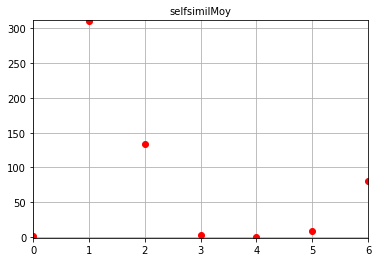

In [63]:
#
res=[]
for fichier in filelist:
    S = read(fichier)
    res.append(selfsimilMoy(S))
X = np.arange(len(res))
plt.plot(X, res, 'ro')
plt.grid()
#axeX = np.arange(11)
#plt.xticks(arrayscale(axeX,len(res)-1))
    
plt.xlim(0, len(res)-1)
plt.ylim(-1, max(res)+1)
plt.title("selfsimilMoy", fontsize=10)
#plt.show()

dest = "tests_selfsimilMoy.pdf"
   
plt.savefig(dest)

In [64]:
#------------liste d'intervales-------------------------#
# Renvoie une liste d'intervales pour une taille donnée
def liste_intervales(nb, taille):
    taille_intervale = int(taille / nb)
    intervals = [0] * nb
    for i in range(0, nb):
        intervals[i] = taille_intervale
    ecart = taille - nb * taille_intervale
    milieu = int(nb / 2)
    i = 0
    while (ecart > 0):
        intervals[milieu + i] = intervals[milieu + i] + 1
        if(i <= 0):
            i = -i + 1
        else:
            i = -i
        ecart -= 1
    return intervals

def doubleXvals(list):
    res=[0]
    j = len(list)
    for i in range (j-2):
        res.append(list[i+1])
        res.append(list[i+1])
    res.append(list[j-1])
    return res

def doubleYvals(list):
    res=[]
    j = len(list)
    for i in range (j):
        res.append(list[i])
        res.append(list[i])
    return res

def doubleYvalsLog(list):
    res=[]
    j = len(list)
    for i in range (j):
        res.append(a2db(list[i]))
        res.append(a2db(list[i]))
    return res

def arrayscale (Array, maxout):
    maxin = (np.max(Array))
    res =  np.multiply(Array, maxout/maxin)
    return np.round_(res, 3)

maxS1 = np.max(np.max(S1))
print ("maxS", maxS1)

maxS 0.000103


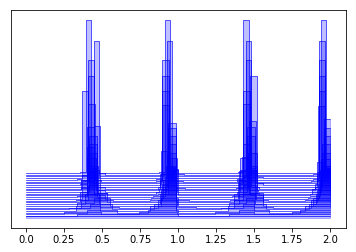

In [71]:
# graphe du fichier texte
def plotX2(filetxt, coeff):
    S = read(filetxt)
    maxS = np.max(np.max(S))
    for k in range (27):
        line = S[k]
        nb_interval = len(line)
        intervales = liste_intervales(len(line), len(S) * coeff)
        x = doubleXvals(dx2x(intervales))
        y = doubleYvals(np.add(line, k*maxS))
        #print ("x", x)
        #print ("y", y)
        plt.plot(x, y, color="blue", linewidth=0.5)
        plt.fill_between(x, k*maxS, y, color='blue', alpha=.25)
        
    axeX = np.arange(9)
    plt.xticks(arrayscale(axeX,270), arrayscale(axeX,2.0))
    plt.yticks([])

    lfile = filetxt.split("_")
    filename = lfile[0]+"_"+lfile[1]+"_"+lfile[2]+"_"+lfile[3]+"_"+lfile[4]+"_"+lfile[5]+"_"+lfile[6]
    
    #plt.title(label="courbe_"+filename, loc='center')
    plt.show()
    #plt.savefig("courbe_"+filename + ".pdf")
    # Efface tous les tracés présents sur le graphe
    #plt.gcf().clear()

plotX2(file1, 10)

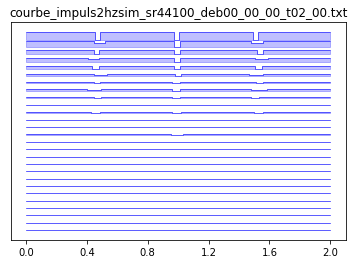

In [74]:

# Graphe des distances entre une bande et la même bande rotation 'i' pour toutes les bandes
def plotX2sim(filetxt, coeff):
    S = all_selfsimil(read(filetxt))
    maxS = np.max(np.max(S))
    for k in range (27):
        line = S[k]
        nb_interval = len(line)
        intervales = liste_intervales(len(line), len(S) * coeff)
        x = doubleXvals(dx2x(intervales))
        y = doubleYvals(np.add(line, k*maxS))
        #print ("x", x)
        #print ("y", y)
        plt.plot(x, y, color="blue", linewidth=0.5)
        plt.fill_between(x, k*maxS, y, color='blue', alpha=.25)
        
    axeX = np.arange(6)
    plt.xticks(arrayscale(axeX,270), arrayscale(axeX,2.0))
    plt.yticks([])

    lfile = filetxt.split("_")
    filename = lfile[0]+"sim_"+lfile[1]+"_"+lfile[2]+"_"+lfile[3]+"_"+lfile[4]+"_"+lfile[5]+"_"+lfile[6]
    
    #plt.title(label="courbe_"+filename, loc='center')
    #plt.title('Easy as 1, 2, 3')
    plt.title("courbe_"+filename, loc='center')
    plt.show()
    #plt.savefig("courbe_"+filename + ".pdf")
    # Efface tous les tracés présents sur le graphe
    plt.gcf().clear()

    
plotX2sim(file1, 10)
#print (all_selfsimil(S1))

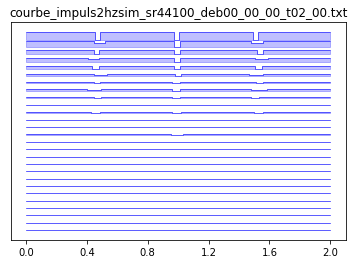

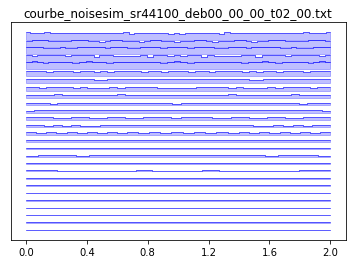

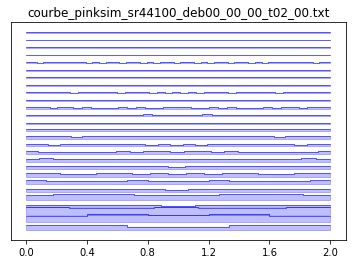

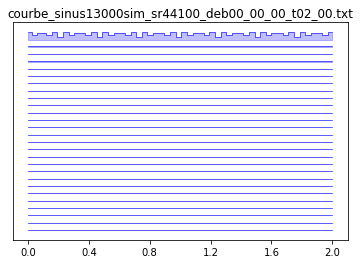

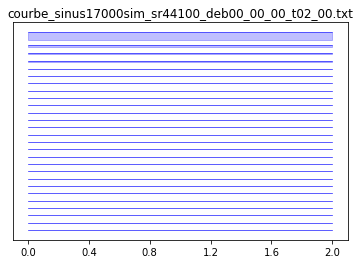

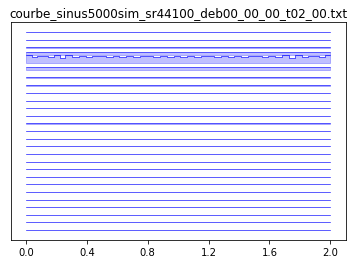

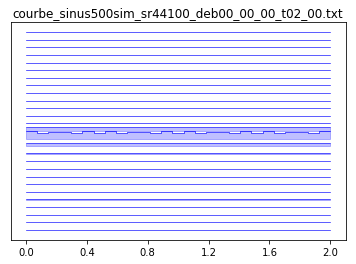

In [73]:
for n in range (len( filelist)):
    plotX2sim(filelist[n], 10)
